##Лабораторная работа №4
«Численное интегрирование» и «Численные методы решения
обыкновенных дифференциальных уравнений». Балагур Дмитрий 6204 вторая группа.

In [ ]:
import math
import sympy as sm
import numpy as np
from prettytable import PrettyTable
from scipy.integrate import odeint
import matplotlib.pyplot as plt

$$f(x) = x*arctg(x)$$
$$a = 0$$
$$b = 1$$

$$M = max(f''(x)), x\in [a,b]$$
$$f'(x) = arctgx + \frac{x}{(1+x^2)}$$
$$f''(x) = \frac{2}{(1+x^2)^2}$$




Функция симметрична относительно Оу, максимальное значение при х = 0

$$M = f''(0) = 2$$

Находим шаг h

$$\frac{M \cdot |b-a| \cdot h^2}{12} < \epsilon$$

$$\frac{2 \cdot |1-0| \cdot h^2}{12} < 0.001$$

$$h  \approx 0.077$$
$$n = \frac{b-a}{h} = \frac{1}{0,077}=12,98$$
Округляем до 16, h = 1/16 = 0,0625

##Формула трапеций


>



*h* = 0,0625


In [ ]:
ft = 0
for x in range(0,17):
  if x==0 or x==16:
    ft+=(x*0.0625*math.atan(x*0.0625)/2)
    continue
  ft+=(x*0.0625*math.atan(x*0.0625))
ft*=0.0625
ft

0.28581660846560053

2h = 0,125

In [ ]:
ft2 = 0
for x in range(0,9):
  if x==0 or x==8:
    ft2+=(x*0.125*math.atan(x*0.125)/2)
    continue
  ft2+=(x*0.125*math.atan(x*0.125))
ft2*=0.125
ft2

0.28707219762553304

Погрешность

In [ ]:
1/3*abs(ft-ft2)

0.0004185297199775043

## Формула *Симпсона*

In [ ]:
fs=0
for x in range(0,17):
  if x==0 or x==16:
    fs+=(x*0.0625*math.atan(x*0.0625))
  elif x%2==0:
    fs+=(2*(x*0.0625*math.atan(x*0.0625)))
  else:
    fs+=(4*(x*0.0625*math.atan(x*0.0625)))
fs*=(0.0625/3)
fs

0.28539807874562295

In [ ]:
fs2=0
for x in range(0,9):
  if x==0 or x==8:
    fs2+=(x*0.125*math.atan(x*0.125))
  elif x%2==0:
    fs2+=(2*x*0.125*math.atan(x*0.125))
  else:
    fs2+=(4*x*0.125*math.atan(x*0.125))
fs2*=(0.125/3)
fs2

0.2853968148693935

Погрешность

In [ ]:
abs(fs-fs2)/15

8.425841529676367e-08

## Значение интеграла с помощью python


In [ ]:
x=sm.Symbol("x")
f = x * sm.atan(x)
f

x*atan(x)

In [ ]:
inte=sm.integrate(f,(x,0,1))
inte

-1/2 + pi/4

In [ ]:
sm.N(inte)

0.285398163397448

## Формула Ньютона-Лейбница

$$\int_{0}^{1} {x * arctg(x)} dx = \left. \frac{arctg(x)}{2x^2}-\frac{1}{4x^2}+\frac{arctg(x)}{2} \right|_{0}^{1} =$$
$$ = \frac{arctg(1)}{2^2}-\frac{1}{4^2}+\frac{arctg(1)}{2}-\frac{arctg(0)}{0^2}+\frac{1}{0^2}-\frac{arctg(0)}{2} = \frac{pi}{4} -0.5 $$

## Результаты

In [ ]:
print("Формула трапеций:",ft)
print("Формула Симсона:",fs)
print("Питон:", sm.N(inte))
print("По Ньютона-Лейбница", sm.N(inte))

Формула трапеций: 0.28581660846560053
Формула Симсона: 0.28539807874562295
Питон: 0.285398163397448
По Ньютона-Лейбница 0.285398163397448


##Задание 2


$$xy'+y=y^{3}e^{-x}$$
$$y(1)=1$$
$$a = 1$$
$$b = 2$$

##Метод Рунге-Кутта


>

In [ ]:
def f(x, y):
    return ((y **3) * math.exp(-x) - y )/ x

In [ ]:
def runge_kutte_step(x0, y0, h, b, epsilon):
    temp_h = h
    while True:
        y2 = y0 + temp_h * (f(x0 + temp_h, y0 + temp_h * f(x0, y0)))
        y2_tilde = y0 + temp_h * (f(x0 + 2*temp_h, y0 + 2*temp_h * f(x0, y0)))
        if abs(y2 - y2_tilde) / 15 > epsilon:
            return temp_h
        temp_h *= 2
x0 = 1
y0 = 1
h0 = 0.1
b = 2
epsilon = 1e-4
n = 16

h = runge_kutte_step(x0, y0, h0, b, epsilon)
print("Шаг интегрирования h для метода Рунге-Кутта:", h)

Шаг интегрирования h для метода Рунге-Кутта: 0.1



$$y_{k+1} = y_k + \frac{h}{6}(F_1 + 2F_2 + 2F_3 + F_4)$$

$$F_1 = f(x_k, y_k)$$


$$F_2 = f\left(x_k + \frac{h}{2}, y_k + \frac{h}{2}F_1\right)$$

$$F_3 = f\left(x_k + \frac{h}{2}, y_k + \frac{h}{2}F_2\right)$$

$$F_4 = f\left(x_{k+1}, y_k + hF_3\right)$$



In [ ]:
def runge_kutte_iteration(X, Y, k, h):
  F1 = f(X[k], Y[k])
  F2 = f(X[k]+h/2, Y[k]+h/2*F1)
  F3 = f(X[k]+h/2, Y[k]+h/2*F2)
  F4 = f(X[k]+h, Y[k]+h*F3)
  y = (Y[k]+h/6*(F1+2*F2+2*F3+F4))
  return y

def runge_kutte(a, b, y0, h):
  double_h = h*2
  n = abs(b-a)/h
  X = []
  Y = []
  Y_tilda = []
  delta = []
  Y.append(y0)
  Y_tilda.append(y0)
  X.append(1)
  delta.append(0)
  i = a+h
  k=0
  while (n):
    i = round(i, 1)
    X.append(i)
    Y.append(runge_kutte_iteration(X, Y, k, h))
    if ((k+1)%2==0):
      Y_tilda.append(runge_kutte_iteration(X, Y, k, double_h))
      delta.append(abs(Y_tilda[k+1]-Y[k+1]))
    else:
      Y_tilda.append(None)
      delta.append(None)
    k+=1
    i+=h
    n-=1
  return X, Y, Y_tilda, delta

X, Y_runge, Y_tilda, delta = runge_kutte(1, 2, 1, 0.1)
runge_table = PrettyTable()

runge_table.add_column('x', X)
runge_table.add_column('y', Y_runge)
runge_table.add_column('y_tilda', Y_tilda)
runge_table.add_column('delta', delta)

print(runge_table)

+-----+--------------------+--------------------+----------------------+
|  x  |         y          |      y_tilda       |        delta         |
+-----+--------------------+--------------------+----------------------+
|  1  |         1          |         1          |          0           |
| 1.1 | 0.9381066694643163 |        None        |         None         |
| 1.2 | 0.8797844341275228 | 0.8258036055558501 | 0.053980828571672745 |
| 1.3 | 0.8258001693500862 |        None        |         None         |
| 1.4 | 0.7763478561491267 | 0.7313006582275807 | 0.04504719792154599  |
| 1.5 | 0.7312993519872588 |        None        |         None         |
| 1.6 | 0.6903639285268436 | 0.6531838470309056 | 0.03718008149593799  |
| 1.7 | 0.6531833314135147 |        None        |         None         |
| 1.8 | 0.6193852870197913 | 0.5886119040942844 | 0.03077338292550691  |
| 1.9 | 0.5886116935452553 |        None        |         None         |
| 2.0 | 0.5605320015274873 | 0.5348483310847499 | 0

##Метод Эйлера


>

$$ y_{k+1} = y_k + h f(x_k, y_k) $$


In [ ]:
def euler_method(a, b, y0, h):
  double_h = h*2
  n = abs(b-a)/h
  X = []
  Y = []
  Y_tilda = []
  delta = []
  Y.append(y0)
  Y_tilda.append(y0)
  X.append(1)
  delta.append(0)
  i = a+h
  k=0
  while (n):
    i = round(i, 1)
    X.append(i)
    Y.append(Y[k]+h*f(X[k], Y[k]))
    if ((k+1)%2==0):
      Y_tilda.append(Y_tilda[k-1]+double_h*f(X[k-1], Y[k-1]))
      delta.append(abs(Y_tilda[k+1]-Y[k+1]))
    else:
      Y_tilda.append(None)
      delta.append(None)
    k+=1
    i+=h
    n-=1
  return X, Y, Y_tilda, delta

X, Y_eu, Y_tilda_eu, delta = euler_method(1, 2, 1, 0.1)

euler_table = PrettyTable()

euler_table.add_column('x', X)
euler_table.add_column('y', Y_eu)
euler_table.add_column('y_tilda', Y_tilda_eu)
euler_table.add_column('delta', delta)

print(euler_table)

+-----+--------------------+--------------------+----------------------+
|  x  |         y          |      y_tilda       |        delta         |
+-----+--------------------+--------------------+----------------------+
|  1  |         1          |         1          |          0           |
| 1.1 | 0.9367879441171443 |        None        |         None         |
| 1.2 | 0.8765029340357132 | 0.8735758882342884 | 0.002927045801424777 |
| 1.3 | 0.8203625325381864 |        None        |         None         |
| 1.4 | 0.7688319300708197 | 0.7612950852392348 | 0.007536844831584899 |
| 1.5 | 0.7219202270202486 |        None        |         None         |
| 1.6 | 0.6793889456578024 | 0.6674716791380925 | 0.011917266519709924 |
| 1.7 | 0.6408841203778035 |        None        |         None         |
| 1.8 | 0.606013768161992  | 0.5904620285780948 | 0.015551739583897217 |
| 1.9 | 0.5743901672150065 |        None        |         None         |
| 2.0 | 0.5456508964082228 | 0.5272148266841236 | 0

##Python


>

In [ ]:
def dydx(y, x):
  return ((y **3) * math.exp(-x) - y )/ x
y0 = 1
x = np.linspace(1, 2, 11)
Y_py = odeint(dydx, y0, x)

print(Y_py)

[[1.        ]
 [0.93810639]
 [0.87978403]
 [0.82579965]
 [0.77634729]
 [0.73129878]
 [0.69036337]
 [0.65318279]
 [0.61938476]
 [0.58861118]
 [0.5605315 ]]


In [ ]:
final_table = PrettyTable()

final_table.add_column('x', X)
final_table.add_column('Эйлер', Y_eu)
final_table.add_column('Рунге-Кутт', Y_runge)
final_table.add_column('Питон', Y_py)

print(final_table)

+-----+--------------------+--------------------+--------------+
|  x  |       Эйлер        |     Рунге-Кутт     |    Питон     |
+-----+--------------------+--------------------+--------------+
|  1  |         1          |         1          |     [1.]     |
| 1.1 | 0.9367879441171443 | 0.9381066694643163 | [0.93810639] |
| 1.2 | 0.8765029340357132 | 0.8797844341275228 | [0.87978403] |
| 1.3 | 0.8203625325381864 | 0.8258001693500862 | [0.82579965] |
| 1.4 | 0.7688319300708197 | 0.7763478561491267 | [0.77634729] |
| 1.5 | 0.7219202270202486 | 0.7312993519872588 | [0.73129878] |
| 1.6 | 0.6793889456578024 | 0.6903639285268436 | [0.69036337] |
| 1.7 | 0.6408841203778035 | 0.6531833314135147 | [0.65318279] |
| 1.8 | 0.606013768161992  | 0.6193852870197913 | [0.61938476] |
| 1.9 | 0.5743901672150065 | 0.5886116935452553 | [0.58861118] |
| 2.0 | 0.5456508964082228 | 0.5605320015274873 | [0.5605315]  |
+-----+--------------------+--------------------+--------------+


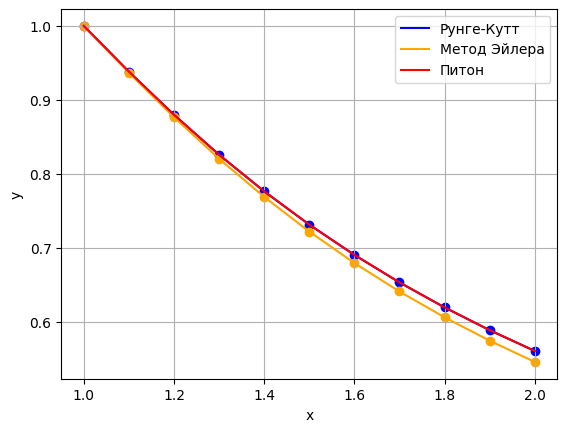

In [ ]:
plt.plot(X, Y_runge, label='Рунге-Кутт', color='blue')
plt.scatter(X, Y_runge, color='blue')
plt.plot(X, Y_eu, label='Метод Эйлера', color='orange')
plt.scatter(X, Y_eu, color='orange')
plt.plot(X, Y_py, label='Питон', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()